# post data training analysis based on iou scores


# getting iou scores for each individual point and stored in a list

In [ ]:
len(X_train)

10054

In [ ]:
"for each data point we have train data loader of [0][0] for inputs,[0][1] for y inputs or class labels"
iou_scores=[]
for i in range(len(X_train)):
  z=[i for i in (model_vgg16.evaluate(train_dataloader[i][0],train_dataloader[i][1]))]
  iou_scores.append(z[1])
iou_scores

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 101ms/step - loss: 0.7424 - iou_score: 0.3861


[0.4022568166255951,
 0.39622238278388977,
 0.4973260760307312,
 0.3999897539615631,
 0.39996790885925293,
 0.3882289230823517,
 0.38565385341644287,
 0.39384299516677856,
 0.3999536335468292,
 0.3999500870704651,
 0.3999940752983093,
 0.39995256066322327,
 0.39997434616088867,
 0.39953503012657166,
 0.4066072106361389,
 0.39907020330429077,
 0.39997148513793945,
 0.39537543058395386,
 0.39999082684516907,
 0.36738160252571106,
 0.39997199177742004,
 0.39996451139450073,
 0.48352575302124023,
 0.4185427725315094,
 0.39312052726745605,
 0.39266616106033325,
 0.5070134997367859,
 0.3690376579761505,
 0.39969849586486816,
 0.3636808395385742,
 0.4556518495082855,
 0.39692801237106323,
 0.39999037981033325,
 0.3999822735786438,
 0.3999651074409485,
 0.3996751010417938,
 0.3768337368965149,
 0.42203155159950256,
 0.3999490737915039,
 0.3927907347679138,
 0.3949313461780548,
 0.3999447226524353,
 0.3839170038700104,
 0.3999643921852112,
 0.39994198083877563,
 0.4688264727592468,
 0.397086769

In [ ]:
len(iou_scores)

10054

In [ ]:
iou_scores_array=np.array(iou_scores)

In [ ]:
X_train['iou_scores']=iou_scores_array

In [ ]:
X_train['iou_scores'].values

array([0.40225682, 0.39622238, 0.49732608, ..., 0.39994726, 0.35904872,
       0.38606232])

In [ ]:
worse,medium,best=0,0,0
for i in X_train["iou_scores"].values:
  if 0<i<0.2:
    worse+=1
  elif 0.2<i<0.4:
    medium+=1
  elif 0.4<i<0.6:
    best+=1  

In [ ]:
worse,medium,best

(191, 7858, 2005)

divide the train data into best,medium,worse data based on the iou scores

best in between 0.4<threshold<0.6

medium in between 0.4<threshold<0.6

worse in between 0<threshold<0.2


# Best data frame

In [ ]:
X_Best=X_train[(X_train["iou_scores"]>0.4)]

# Medium

In [ ]:
X_medium=X_train[(X_train["iou_scores"]>0.2) & (X_train["iou_scores"]<0.4)]

# Worse

In [ ]:
X_worse=X_train[(X_train["iou_scores"]>0) & (X_train["iou_scores"]<0.2)]

# Post EDA on best data

<ipython-input-210-9ee5332cba2e>:19: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(per_of_defects, colors=colors, labels=Defects,


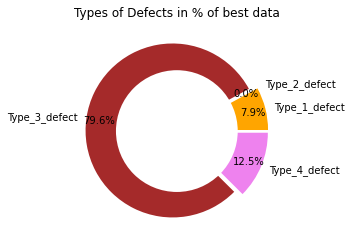

In [ ]:
#https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html
#
import matplotlib.pyplot as plt

# Setting labels for items in Chart
Defects = ['Type_1_defect','Type_2_defect','Type_3_defect','Type_4_defect']

# Setting size in Chart based on
# given values
per_of_defects = [X_Best[['hasDefect_1']].sum(axis = 0),X_Best[['hasDefect_2']].sum(axis = 0),X_Best[['hasDefect_3']].sum(axis = 0),X_Best[['hasDefect_4']].sum(axis = 0)]

# colors
colors = ['Orange', 'Gray', 'Brown',
		'Violet']
# explosion
explode = (0.05, 0.05,0.05,0.05)

# Pie Chart
plt.pie(per_of_defects, colors=colors, labels=Defects,
		autopct='%1.1f%%', pctdistance=0.85,
		explode=explode)

# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

# Adding Title of chart
plt.title('Types of Defects in % of best data')

# Displaying Chart
plt.show()

Interesting thing in best data is the points belongs to class 2 defects count is zero

most of the data points in the best data is type 3 defects.

where as type 1 and type 4 defects are almost equally distributed but majority of the points were belong to class 3 defects

# Post EDA on the worse data

<ipython-input-211-ed7385c450ff>:19: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(per_of_defects, colors=colors, labels=Defects,


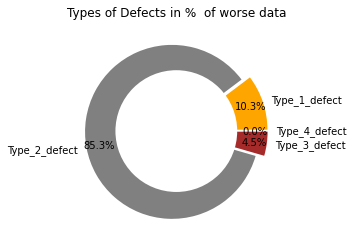

In [ ]:
#https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html
#
import matplotlib.pyplot as plt

# Setting labels for items in Chart
Defects = ['Type_1_defect','Type_2_defect','Type_3_defect','Type_4_defect']

# Setting size in Chart based on
# given values
per_of_defects = [X_worse[['hasDefect_1']].sum(axis = 0),X_worse[['hasDefect_2']].sum(axis = 0),X_worse[['hasDefect_3']].sum(axis = 0),X_worse[['hasDefect_4']].sum(axis = 0)]

# colors
colors = ['Orange', 'Gray', 'Brown',
		'Violet']
# explosion
explode = (0.05, 0.05,0.05,0.05)

# Pie Chart
plt.pie(per_of_defects, colors=colors, labels=Defects,
		autopct='%1.1f%%', pctdistance=0.85,
		explode=explode)

# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

# Adding Title of chart
plt.title('Types of Defects in %  of worse data')

# Displaying Chart
plt.show()

Interesting thing in worse data is the points belongs to class 4 defects count is zero

most of the data points in the worse data is type 2 defects.

where as type 4 defects count is zero in worse data and type 3 defects are almost negligible number

type 1 defect count is almost same in both worse and best data

# Post EDA in medium data

<ipython-input-214-916d4436ebd2>:19: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(per_of_defects, colors=colors, labels=Defects,


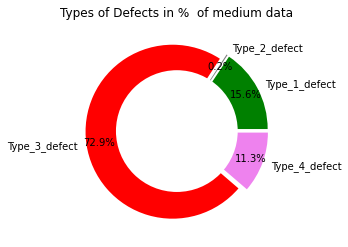

In [ ]:
#https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html
#
import matplotlib.pyplot as plt

# Setting labels for items in Chart
Defects = ['Type_1_defect','Type_2_defect','Type_3_defect','Type_4_defect']

# Setting size in Chart based on
# given values
per_of_defects = [X_medium[['hasDefect_1']].sum(axis = 0),X_medium[['hasDefect_2']].sum(axis = 0),X_medium[['hasDefect_3']].sum(axis = 0),X_medium[['hasDefect_4']].sum(axis = 0)]

# colors
colors = ['green', 'Gray', 'red',
		'Violet']
# explosion
explode = (0.05, 0.05,0.05,0.05)

# Pie Chart
plt.pie(per_of_defects, colors=colors, labels=Defects,
		autopct='%1.1f%%', pctdistance=0.85,
		explode=explode)

# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

# Adding Title of chart
plt.title('Types of Defects in %  of medium data')

# Displaying Chart
plt.show()

Interesting thing is both in medium data,best data the points belongs to class 2 defects count is zero 

most of the data points in the best data is type 3 defects.

where as type 1 and type 4 defects are almost equally distributed but majority of the points were belong to class 3 defects

# overall comparison of Best,Worse,Medium data

Both in best and medium data the distribution of defects(defect1,defect_3,defect_4) are same in % wise

worse data dominated by class 2 defects.model does not correctly predicted the points this is due to  data may be corrupted or may be model does not capture features from image belongs to defect_2 types.we can add more data i.e belong to type_2 defect to overcome the misclassification

Type 1 defect also does not correctly predicted since the number of points in total is very less.

from above observations adding more number of classs 1 and class 2 points to existing data we can increasse the iou scores of the model.

